In [1]:
import numpy as np
from utils.dataLoader import dataLoader
from models.DT import DT
from sklearn.model_selection import KFold
from CrossValidation import CrossValidation
from Test import Test
from models.KNN import KNN
from matplotlib import pyplot as plt
#%matplotlib inline

N = 10
k_choices = range(1, 31)

k_to_average_precision_DT = {}
k_to_average_recall_DT = {}
k_to_average_accuracy_DT = {}
k_to_average_sensitivity_DT = {}
k_to_average_specificity_DT = {}

k_to_average_precision_KNN = {}
k_to_average_recall_KNN = {}
k_to_average_accuracy_KNN = {}
k_to_average_sensitivity_KNN = {}
k_to_average_specificity_KNN = {}

for k in k_choices:
    average_precision_DT, average_recall_DT, average_accuracy_DT, average_sensitivity_DT, average_specificity_DT = CrossValidation(N, 'DT', k)
    k_to_average_precision_DT[k] = average_precision_DT
    k_to_average_recall_DT[k] = average_recall_DT
    k_to_average_accuracy_DT[k] = average_accuracy_DT
    k_to_average_sensitivity_DT[k] = average_sensitivity_DT
    k_to_average_specificity_DT[k] = average_specificity_DT
    average_precision_KNN, average_recall_KNN, average_accuracy_KNN, average_sensitivity_KNN, average_specificity_KNN = CrossValidation(N, 'KNN', k)
    k_to_average_precision_KNN[k] = average_precision_KNN
    k_to_average_recall_KNN[k] = average_recall_KNN
    k_to_average_accuracy_KNN[k] = average_accuracy_KNN
    k_to_average_sensitivity_KNN[k] = average_sensitivity_KNN
    k_to_average_specificity_KNN[k] = average_specificity_KNN

In [2]:
k_values_DT = sorted(k_to_average_accuracy_DT.keys())
k_values_KNN = sorted(k_to_average_accuracy_KNN.keys())
accuracy_values_DT = [k_to_average_accuracy_DT[k] for k in k_values_DT]
accuracy_values_KNN = [k_to_average_accuracy_KNN[k] for k in k_values_KNN]

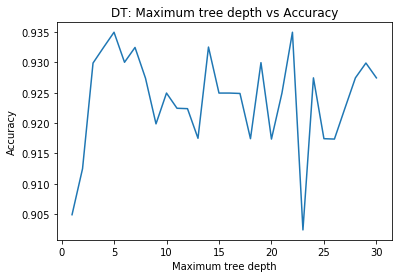

In [3]:
plt.figure()
plt.title("DT: Maximum tree depth vs Accuracy")
plt.xlabel("Maximum tree depth")
plt.ylabel("Accuracy")
plt.plot(k_values_DT, accuracy_values_DT)
plt.show()

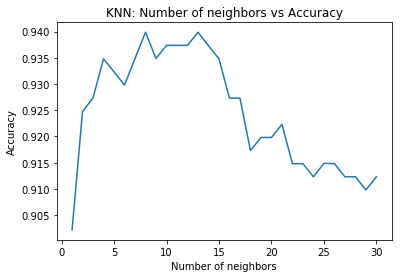

In [4]:
plt.figure()
plt.title("KNN: Number of neighbors vs Accuracy")
plt.xlabel("Number of neighbors")
plt.ylabel("Accuracy")
plt.plot(k_values_KNN, accuracy_values_KNN)
plt.show()

In [5]:
best_accuracy_DT = np.max(accuracy_values_DT)
best_k_DT = k_values_DT[np.argmax(accuracy_values_DT)]
best_precision_DT = k_to_average_precision_DT[best_k_DT]
best_recall_DT = k_to_average_recall_DT[best_k_DT]
best_sensitivity_DT = k_to_average_sensitivity_DT[best_k_DT]
best_specificity_DT = k_to_average_specificity_DT[best_k_DT]

print('DT: k = %d, maximum average accuracy = %f' % (best_k_DT, best_accuracy_DT))
print('average precision = %f' % best_precision_DT)
print('average recall = %f' % best_recall_DT)
print('average sensitivity = %f' % best_sensitivity_DT)
print('average specificity = %f' % best_specificity_DT)

best_accuracy_KNN = np.max(accuracy_values_KNN)
best_k_KNN = k_values_KNN[np.argmax(accuracy_values_KNN)]
best_precision_KNN = k_to_average_precision_KNN[best_k_KNN]
best_recall_KNN = k_to_average_recall_KNN[best_k_KNN]
best_sensitivity_KNN = k_to_average_sensitivity_KNN[best_k_KNN]
best_specificity_KNN = k_to_average_specificity_KNN[best_k_KNN]
print('KNN: k = %d, maximum average accuracy = %f' % (best_k_KNN, best_accuracy_KNN))
print('average precision = %f' % best_precision_KNN)
print('average recall = %f' % best_recall_KNN)
print('average sensitivity = %f' % best_sensitivity_KNN)
print('average specificity = %f' % best_specificity_KNN)


DT: k = 5, maximum average accuracy = 0.934936
average precision = 0.912021
average recall = 0.916590
average sensitivity = 0.916590
average specificity = 0.942363
KNN: k = 8, maximum average accuracy = 0.939872
average precision = 0.962173
average recall = 0.868716
average sensitivity = 0.868716
average specificity = 0.979210


In [6]:
test_precision_DT, test_recall_DT, test_accuracy_DT, test_sensitivity_DT, test_specificity_DT = Test('DT', best_k_DT)
print("DT: test precision is: %f " % test_precision_DT)
print("DT: test recall is: %f " % test_recall_DT)
print("DT: test accuracy is: %f " % test_accuracy_DT)
print("DT: test sensitivity is: %f " % test_sensitivity_DT)
print("DT: test specificity is: %f " % test_specificity_DT)
test_precision_KNN, test_recall_KNN, test_accuracy_KNN, test_sensitivity_KNN, test_specificity_KNN = Test('KNN', best_k_KNN)
print("KNN: test precision is: %f " % test_precision_KNN)
print("KNN: test recall is: %f " % test_recall_KNN)
print("KNN: test accuracy is: %f " % test_accuracy_KNN)
print("KNN: test sensitivity is: %f " % test_sensitivity_KNN)
print("KNN: test specificity is: %f " % test_specificity_KNN)

DT: test precision is: 0.855072 
DT: test recall is: 0.936508 
DT: test accuracy is: 0.917647 
DT: test sensitivity is: 0.936508 
DT: test specificity is: 0.906542 
KNN: test precision is: 0.931034 
KNN: test recall is: 0.857143 
KNN: test accuracy is: 0.923529 
KNN: test sensitivity is: 0.857143 
KNN: test specificity is: 0.962617 


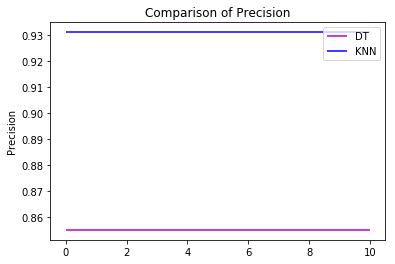

In [7]:
plt.figure()
plt.title("Comparison of Precision")
plt.ylabel("Precision")
plt.hlines(test_precision_DT, 0, 10, 'm', label='DT')
plt.hlines(test_precision_KNN, 0, 10, 'b', label='KNN')
plt.legend()
plt.show()

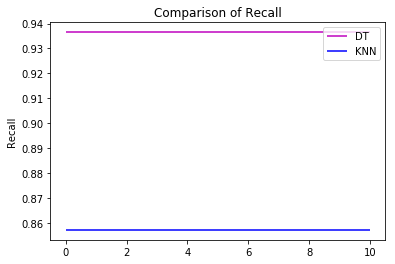

In [8]:
plt.figure()
plt.title("Comparison of Recall")
plt.ylabel("Recall")
plt.hlines(test_recall_DT, 0, 10, 'm', label='DT')
plt.hlines(test_recall_KNN, 0, 10, 'b', label='KNN')
plt.legend()
plt.show()

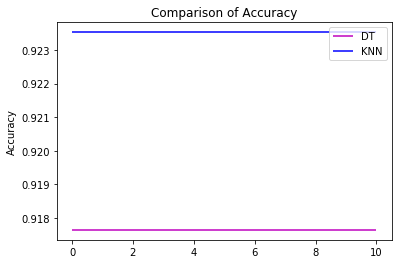

In [9]:
plt.figure()
plt.title("Comparison of Accuracy")
plt.ylabel("Accuracy")
plt.hlines(test_accuracy_DT, 0, 10, 'm', label='DT')
plt.hlines(test_accuracy_KNN, 0, 10, 'b', label='KNN')
plt.legend()
plt.show()

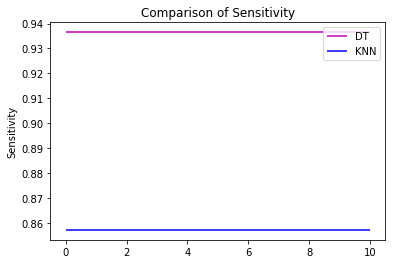

In [10]:
plt.figure()
plt.title("Comparison of Sensitivity")
plt.ylabel("Sensitivity")
plt.hlines(test_sensitivity_DT, 0, 10, 'm', label='DT')
plt.hlines(test_sensitivity_KNN, 0, 10, 'b', label='KNN')
plt.legend()
plt.show()

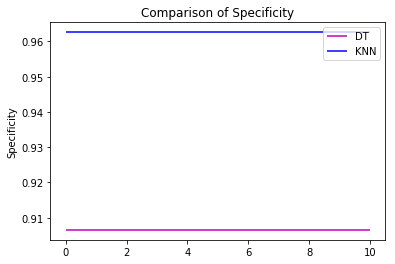

In [11]:
plt.figure()
plt.title("Comparison of Specificity")
plt.ylabel("Specificity")
plt.hlines(test_specificity_DT, 0, 10, 'm', label='DT')
plt.hlines(test_specificity_KNN, 0, 10, 'b', label='KNN')
plt.legend()
plt.show()